Results for plant BRU
Best-fit distribution: norm
mean =  989.218487394958
standard deviation =  108.90790262811456


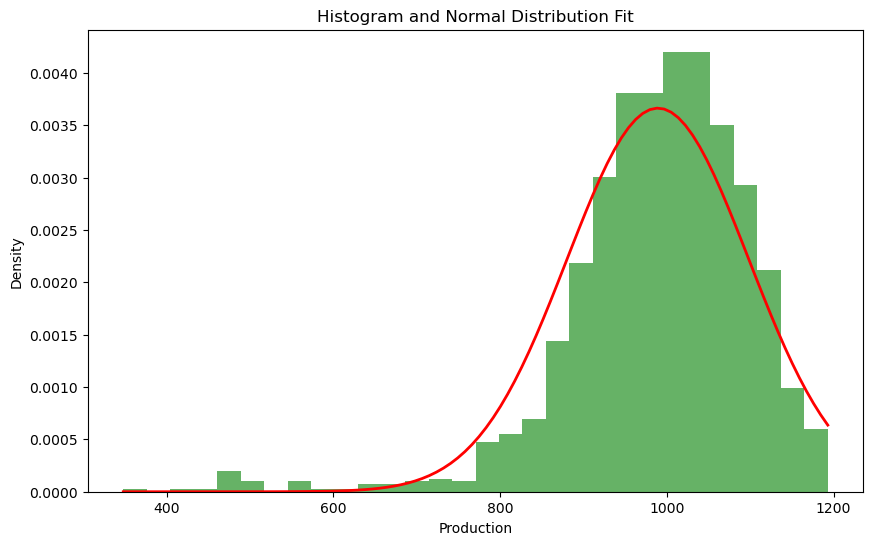

Results for plant STO
Best-fit distribution: norm
mean =  190.9679245283019
standard deviation =  40.17786996986101


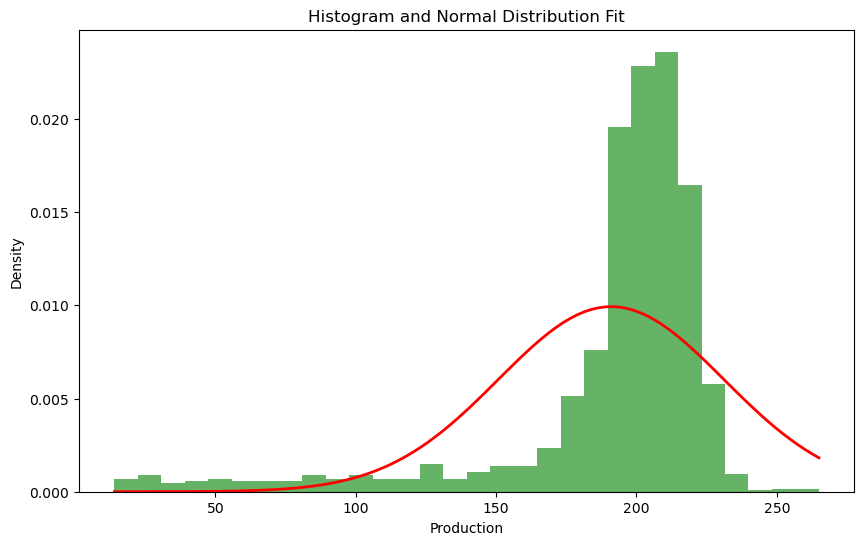

In [1]:
import pandas as pd
import numpy as np
import openpyxl
from pathlib import Path
from scipy import stats
import matplotlib.pyplot as plt

def find_best_fit_distribution_continuous(data, distributions=None):
    """
    Find the best-fit distribution for the given data.

    Parameters:
        data (array-like): The data to fit the distributions to.
        distributions (list, optional): The candidate distributions to consider.
            Defaults to [stats.norm, stats.gamma, stats.expon, stats.uniform].

    Returns:
        best_distribution (scipy.stats.rv_continuous): The best-fit distribution.
        best_params (tuple): The parameters of the best-fit distribution.
    """
    if distributions is None:
        distributions = [
            stats.norm,      # Normal distribution
            stats.gamma,     # Gamma distribution
            stats.expon,     # Exponential distribution
            stats.uniform    # Uniform distribution
        ]

    best_distribution = None
    best_params = {}
    best_sse = np.inf

    for distribution in distributions:
        params = distribution.fit(data)
        sse = np.sum((distribution.pdf(data, *params) - data) ** 2)

        if sse < best_sse:
            best_distribution = distribution
            best_params = params
            best_sse = sse

    return best_distribution, best_params



# Get excel-files in intermediate map
base_path = Path("..") / "data"
intermediate_path = base_path / "intermediate"
xlsx_files = [f for f in intermediate_path.glob('*.xlsx')]

# Analize and plot production data for each production plant
for xlsx_file in xlsx_files:
    plant = str(xlsx_file)
    print ('Results for plant', plant[-8 :-5])
    print ('======================')
    df = pd.read_excel(xlsx_file)
    # Find the best-fit distribution
    filtered_df = df[(df['production']!="#MV") & (df['production'] != 0)].copy()
    filtered_df['production'] = filtered_df['production'].astype(int)
    production_data = filtered_df['production'].values
    best_distribution, best_params = find_best_fit_distribution_continuous(production_data)

    # Print the best-fit distribution and its parameters
    print(f"Best-fit distribution: {best_distribution.name}")
    mean, stdv = best_params
    print ('mean = ', mean)
    print ('standard deviation = ', stdv)

    x = np.linspace(filtered_df['production'].min(), filtered_df['production'].max(), 100)
    y = stats.norm.pdf(x, mean, stdv)
    plt.figure(figsize=(10, 6))
    plt.hist(filtered_df['production'], bins=30, density=True, alpha=0.6, color='g')
    plt.plot(x, y, 'r-', lw=2)
    plt.title('Histogram and Normal Distribution Fit')
    plt.xlabel('Production')
    plt.ylabel('Density')
    plt.show()
  